In [17]:
#Import cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
data = "/Users/brewaterman/Desktop/gwlevels.txt"
df = pd.read_csv(data, sep = "\t", comment = "#")
df.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
0,5s,15s,6s,10d,5d,5s,12s,12s,10s,1s,5s,1s,1s,1s,1s,1s
1,USGS,390644096430202,GW,2000-01-27,NaN,NaN,NaN,1030.89,NGVD29,NaN,USGS,D,2,S,T,A
2,USGS,390644096430202,GW,2000-04-18,NaN,NaN,NaN,1031.38,NGVD29,NaN,USGS,D,2,S,T,A
3,USGS,390644096430202,GW,2000-07-07,10:50,CDT,NaN,1030.93,NGVD29,NaN,USGS,m,2,S,T,A
4,USGS,390644096430202,GW,2000-08-04,NaN,NaN,NaN,1030.22,NGVD29,NaN,USGS,D,2,S,T,A


In [21]:
#pulling out neccessary columns
datawith0 = df[["site_no", "lev_dt", "sl_lev_va", "sl_datum_cd"]]
wellData = datawith0.drop(0)
wellData.head(5)
#wellData.info()
#datawith0

,site_no,lev_dt,sl_lev_va,sl_datum_cd
1,390644096430202,2000-01-27,1030.89,NGVD29
2,390644096430202,2000-04-18,1031.38,NGVD29
3,390644096430202,2000-07-07,1030.93,NGVD29
4,390644096430202,2000-08-04,1030.22,NGVD29
5,390644096430202,2000-08-15,1029.84,NGVD29


In [22]:
#Convert data to types 
wellData = wellData.astype({"sl_lev_va": float})
                       #"lev_dt": float})

In [23]:
#Level dates switches to years 
dates = pd.to_datetime(wellData["lev_dt"])
years = dates.dt.year

#add as col in df
wellData["Years"] = years
wellData.head()

,site_no,lev_dt,sl_lev_va,sl_datum_cd,Years
1,390644096430202,2000-01-27,1030.89,NGVD29,2000
2,390644096430202,2000-04-18,1031.38,NGVD29,2000
3,390644096430202,2000-07-07,1030.93,NGVD29,2000
4,390644096430202,2000-08-04,1030.22,NGVD29,2000
5,390644096430202,2000-08-15,1029.84,NGVD29,2000


In [25]:
#number of years active for well
yearsactive = years.unique() #.tolist()
yearsactive.size

20

In [27]:
#need to calculate average well depth per year (for loop?), tell number of years active (yearsactive), give well name
#output csv
yearsCalc = wellData.groupby('Years')
#yearsCalc.mean()
yearsCalc.agg(['count', 'min', 'max', 'std', 'mean']).head(20)

sl_lev_va                                         
          count      min      max       std         mean
Years                                                   
2000          7  1028.71  1031.38  1.017429  1030.135714
2001          4  1028.13  1029.52  0.655973  1029.085000
2002          8  1026.95  1028.56  0.757806  1027.578750
2003          7  1026.10  1026.89  0.343289  1026.511429
2004          3  1026.03  1027.11  0.544426  1026.530000
2005          5  1027.24  1029.45  1.016897  1028.004000
2006          9  1027.13  1028.15  0.365654  1027.635556
2007         10  1026.90  1032.32  2.125024  1030.602000
2008          7  1031.31  1033.64  1.002687  1032.251429
2009          9  1032.09  1033.42  0.483632  1032.786667
2010          4  1033.18  1034.67  0.689106  1033.670000
2011          3  1030.68  1031.69  0.507379  1031.156667
2012          4  1028.46  1030.53  1.029187  1029.612500
2013          7  1027.58  1028.21  0.245473  1027.957143
2014          4  1027.35  1028.01  0.275318  1027.640000
2015          4  1027.08  1028.88  0.864537  1027.812500
2016          3  1029.04  1031.70  1.489105  1030.756667
2017          6  1030.87  1032.39  0.546504  1031.933333
2018          6  1028.01  1029.79  0.677862  1028.898333
2019          1  1030.78  1030.78       NaN  1030.780000

In [28]:
averageperyear = yearsCalc['sl_lev_va'].mean().sort_values(ascending=False)
print(averageperyear)
#averageperyear.plot(kind='bar', figsize=(12, 6), color='k', alpha=0.5);

Years
2010    1033.670000
2009    1032.786667
2008    1032.251429
2017    1031.933333
2011    1031.156667
2019    1030.780000
2016    1030.756667
2007    1030.602000
2000    1030.135714
2012    1029.612500
2001    1029.085000
2018    1028.898333
2005    1028.004000
2013    1027.957143
2015    1027.812500
2014    1027.640000
2006    1027.635556
2002    1027.578750
2004    1026.530000
2003    1026.511429
Name: sl_lev_va, dtype: float64


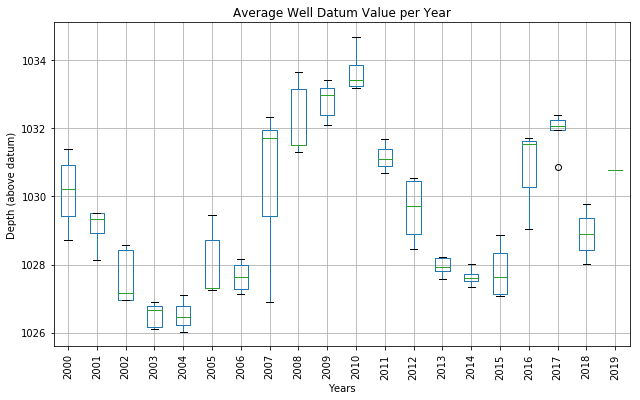

In [29]:

ax = wellData[['sl_lev_va', 'Years']].boxplot(
                by='Years', figsize=(10, 6), rot=90);
ax.set_xlabel('Years');
ax.set_ylabel('Depth (above datum)');
ax.set_title('Average Well Datum Value per Year');
plt.suptitle(''); 

#plt.savefig('gwlevels.jpg')